In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
import mglearn
font_name = fm.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
plt.rc('font', family=font_name)

mpl.rcParams["axes.unicode_minus"] = False
from sklearn.model_selection import train_test_split


## Decision Tree
- P229
- 설명하기 좋은 알고리즘
- 과적합 문제
- 장점 : 전처리가 거의 필요없다.(표준화, scaling 정규화)
- 균일도 측정방식
    + 엔트로피(혼잡도) 이용한 Infomation Gain 지수, P236
    + 지니 계수 : 0(평등 : 다양하게 섞여있음, 균일하지 않음), 1(불평등 : 같은 것들이 모여 있음)
    

#### 시각화 도구 설치

- http://www.graphviz.org
    + 프로그램 다운로드 후 설치(path 설정까지)
- pip install graphviz

In [2]:
!pip install graphviz

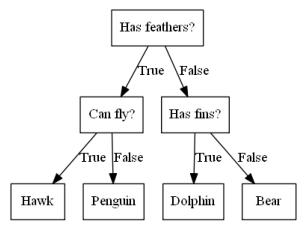

In [6]:
import os
# 덮어 쓰기가 아닌 추가
os.environ["PATH"] += os.pathsep + "C:/Program Files (x86)/Graphviz2.38/bin" 
mglearn.plots.plot_animal_tree()

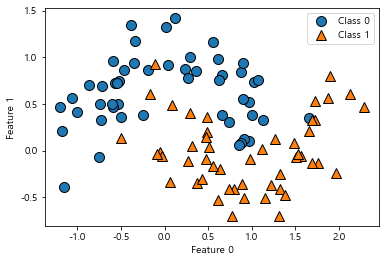

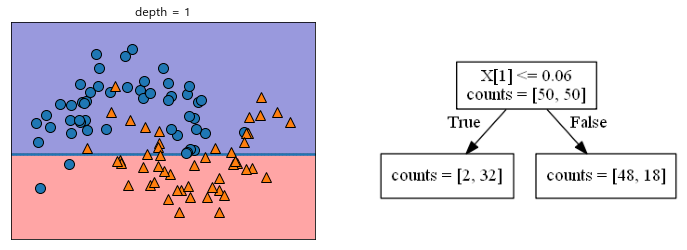

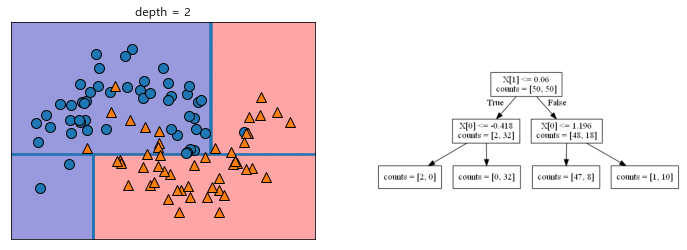

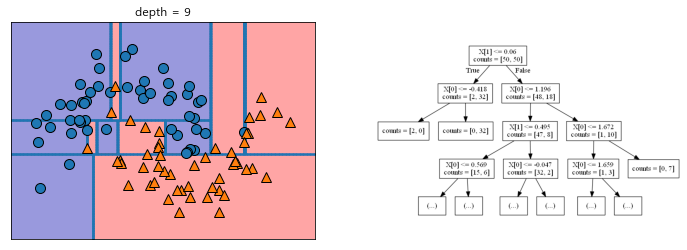

In [7]:
mglearn.plots.plot_tree_progressive()

# 같은 데이터들이 모여 있는 것을 균일도라고 한다.

In [ ]:
# knn : 이웃의 갯수로 튜닝
# 선형모델 : alpha를 조절해 튜닝
# 로지스틱 : c의 갯수로 튜닝

### 복잡도 제어 : Prunning(가지 치기)

- 종류
    + 사전 가지치기
    + 사후 가지치기
    + sklearn에서는 사후 가지치가만 지원
- 파라미터
    + min_samples_split : 
    + min_samples_leaf
    + max_features
    + max_depth
    + max_leaf_nodes

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
import warnings
warnings.filterwarnings('ignore')

In [15]:
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, 
                                                    iris.target,
                                                    test_size=0.2,
                                                    random_state=11)

In [16]:
dt_clf = DecisionTreeClassifier(random_state=156).fit(X_train, y_train)

In [17]:
from sklearn.tree import export_graphviz # 파일로 저장할 때 

In [18]:
export_graphviz(dt_clf, out_file="../Acorn machine learning/tree.dot",
               class_names=iris.target_names,
               feature_names=iris.feature_names,
               impurity=True,
               filled=True)

In [19]:
import os
import graphviz

os.environ["PATH"] += os.pathsep + "C:/Program Files (x86)/Graphviz2.38/bin" 

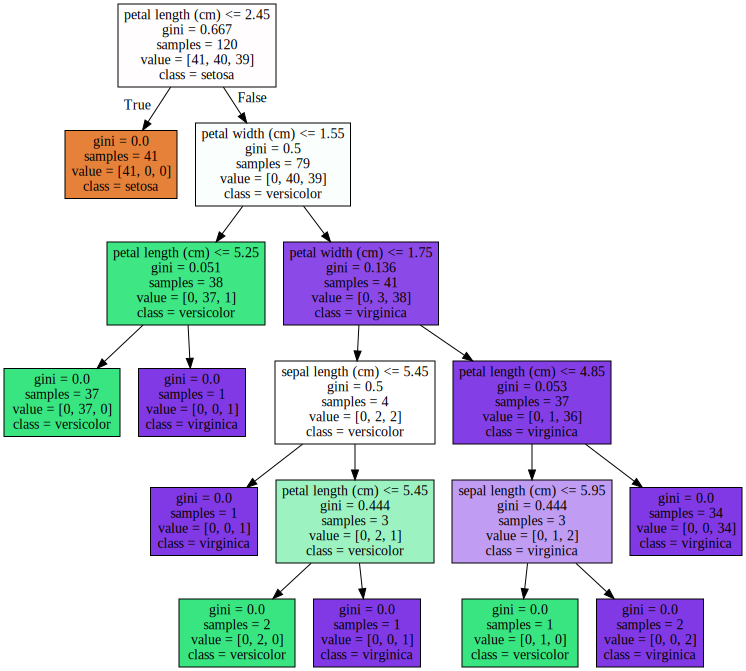

In [20]:
with open("../Acorn machine learning/tree.dot") as f:
    dot_graph = f.read()
    
graphviz.Source(dot_graph)
# 지니계수가 높으면 계속해서 분리해야 한다.
# 지니계수가 0이면 더이상 가지치기 필요없음,

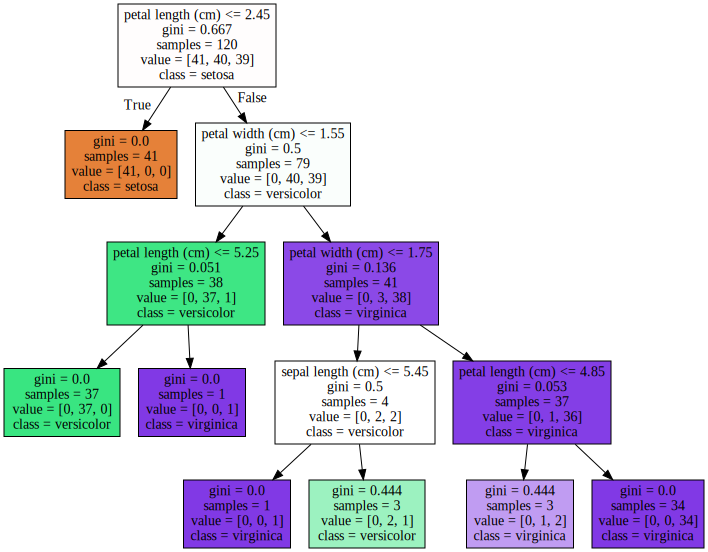

In [22]:
# max_depth, 
# min_samples_split() : 분할하기 위한 최소한의 샘플 수
dt_clf = DecisionTreeClassifier(random_state=156, min_samples_split=4).fit(X_train, y_train)

export_graphviz(dt_clf, out_file="../Acorn machine learning/tree.dot",
               class_names=iris.target_names,
               feature_names=iris.feature_names,
               impurity=True,
               filled=True)

with open("../Acorn machine learning/tree.dot") as f:
    dot_graph = f.read()
    
graphviz.Source(dot_graph)

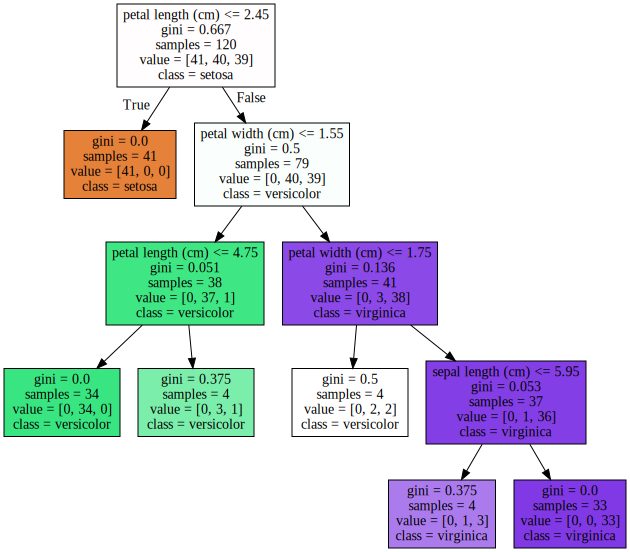

In [23]:
# min_samples_leaf : 리프노드가 되기 위한 최소한의 샘플 수

dt_clf = DecisionTreeClassifier(random_state=156, min_samples_leaf=4).fit(X_train, y_train)

export_graphviz(dt_clf, out_file="../Acorn machine learning/tree.dot",
               class_names=iris.target_names,
               feature_names=iris.feature_names,
               impurity=True,
               filled=True)

with open("../Acorn machine learning/tree.dot") as f:
    dot_graph = f.read()
    
graphviz.Source(dot_graph)

### 특성 중요도

In [25]:
print(dt_clf.feature_importances_)
# 0.54, 0.448로 가장 중하한 특성임을 확인

[0.00594727 0.         0.5459484  0.44810433]


In [26]:
for name, value in zip(iris.feature_names, dt_clf.feature_importances_):
    print(name, value)

sepal length (cm) 0.005947267560959518
sepal width (cm) 0.0
petal length (cm) 0.5459484001108248
petal width (cm) 0.44810433232821567


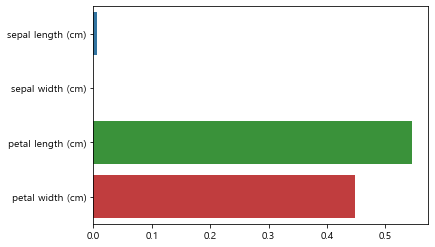

In [27]:
# 중요도 확인
sns.barplot(x=dt_clf.feature_importances_, y=iris.feature_names)

#### breast_cancer 데이터셋 활용


In [28]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, 
                                                    cancer.target,
                                                    stratify=cancer.target, # 데이터 골고루 뽑아냄
                                                    random_state=11)

In [32]:
# training
tree = DecisionTreeClassifier(random_state=0, max_depth=4).fit(X_train, y_train)

In [33]:
print("훈련 정확도 : ", tree.score(X_train, y_train))
print("테스트 정확도 : ", tree.score(X_test, y_test))
# 100%로 정확도

훈련 정확도 :  0.9882629107981221
테스트 정확도 :  0.9020979020979021


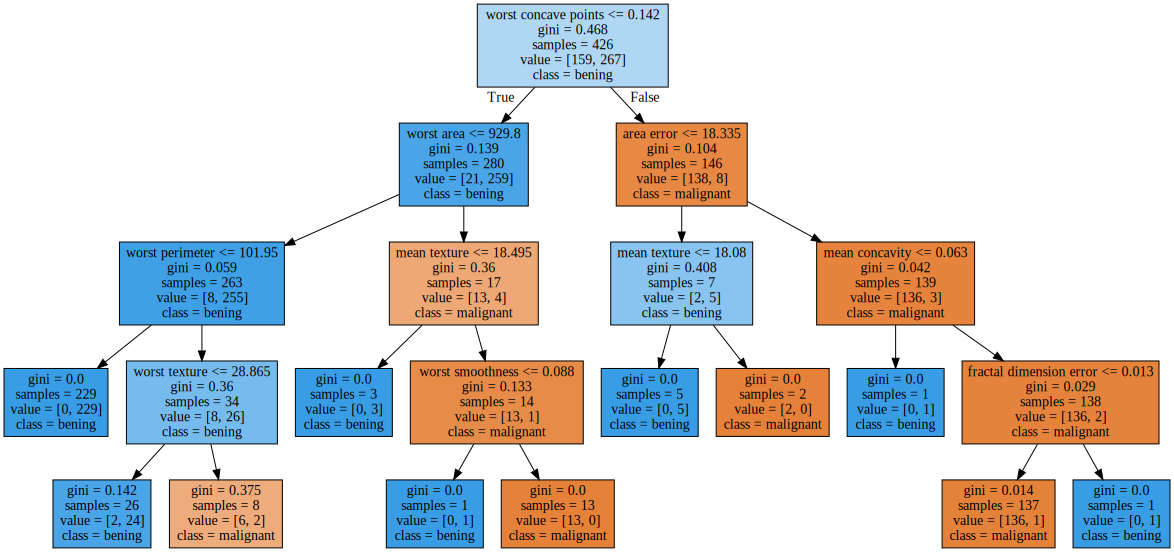

In [34]:
export_graphviz(tree, out_file="../Acorn machine learning/tree.dot",
               class_names=["malignant", "bening"],
               feature_names=cancer.feature_names,
               impurity=True,
               filled=True)

with open("../Acorn machine learning/tree.dot") as f:
    dot_graph = f.read()
    
graphviz.Source(dot_graph)

In [35]:
print(tree.feature_importances_)

[0.         0.03733708 0.         0.         0.         0.
 0.01011621 0.         0.         0.         0.         0.
 0.         0.03354965 0.         0.         0.         0.
 0.         0.01026389 0.         0.02907687 0.01719549 0.09032603
 0.00974202 0.         0.         0.76239276 0.         0.        ]


([<matplotlib.axis.YTick at 0x25b4fcaab50>,
 [Text(0, 0, 'mean radius'),
  Text(0, 0, 'mean texture'),
  Text(0, 0, 'mean perimeter'),
  Text(0, 0, 'mean area'),
  Text(0, 0, 'mean smoothness'),
  Text(0, 0, 'mean compactness'),
  Text(0, 0, 'mean concavity'),
  Text(0, 0, 'mean concave points'),
  Text(0, 0, 'mean symmetry'),
  Text(0, 0, 'mean fractal dimension'),
  Text(0, 0, 'radius error'),
  Text(0, 0, 'texture error'),
  Text(0, 0, 'perimeter error'),
  Text(0, 0, 'area error'),
  Text(0, 0, 'smoothness error'),
  Text(0, 0, 'compactness error'),
  Text(0, 0, 'concavity error'),
  Text(0, 0, 'concave points error'),
  Text(0, 0, 'symmetry error'),
  Text(0, 0, 'fractal dimension error'),
  Text(0, 0, 'worst radius'),
  Text(0, 0, 'worst texture'),
  Text(0, 0, 'worst perimeter'),
  Text(0, 0, 'worst area'),
  Text(0, 0, 'worst smoothness'),
  Text(0, 0, 'worst compactness'),
  Text(0, 0, 'worst concavity'),
  Text(0, 0, 'worst concave points'),
  Text(0, 0, 'worst symmetry'),
  

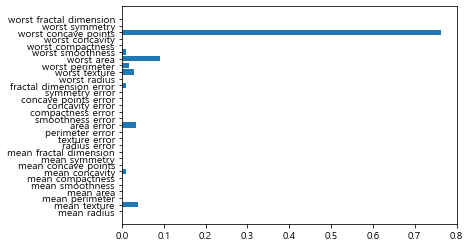

In [38]:
n_features = cancer.data.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align="center")
plt.yticks(np.arange(n_features), cancer.feature_names)

#### 사례 : iris 데이터 활용

In [9]:
from sklearn import datasets

iris = datasets.load_iris()

In [10]:
df = pd.DataFrame(iris.data)
df.columns = iris.feature_names
df["result"] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),result
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [12]:
# 중요도가 높은 petal length와 petal width를  X로 y로 result

X = iris.data[:, [2,3]]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=11)    


In [20]:
# 표준화 전후 차이 확인하기

from sklearn.preprocessing import StandardScaler

sc = StandardScaler().fit(X_train) # 훈련용 데이터를 StandardScaler 통해 스케일 자동 조정
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
# x_train_std # 0~1 사이 값으로 바뀐 것을 확인

In [27]:
# decision Tree로 확인
model = DecisionTreeClassifier(random_state=0, criterion="entropy") # criterion="" : 기본값은 지니계수
model.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', random_state=0)

In [28]:
print("훈련 정확도 : ", model.score(X_train, y_train))
print("테스트 정확도 : ", model.score(X_test, y_test))

훈련 정확도 :  0.9910714285714286
테스트 정확도 :  0.9210526315789473


In [30]:
# 표준화 한 데이터로 확인해보기

model = DecisionTreeClassifier(random_state=0, criterion="entropy") # criterion="" : 기본값은 지니계수
model.fit(X_train_std, y_train)

print("훈련 정확도 : ", model.score(X_train_std, y_train))
print("테스트 정확도 : ", model.score(X_test_std, y_test))

# Decision Tree에서 데이터 표준화는 결과에 큰 변화가 없는 것을 확인

훈련 정확도 :  0.9910714285714286
테스트 정확도 :  0.9210526315789473


#### 사례2 : 서울 지역 동 분류
* 서울 지역(구)의 경도와 위도를 사용해서 임의로 입력된 지역(동)을 강동, 강서, 강남, 강북으로 분류

In [31]:
district_dict_list = [
            {'district': 'Gangseo-gu', 'latitude': 37.551000, 'longitude': 126.849500, 'label':'Gangseo'},
            {'district': 'Yangcheon-gu', 'latitude': 37.52424, 'longitude': 126.855396, 'label':'Gangseo'},
            {'district': 'Guro-gu', 'latitude': 37.4954, 'longitude': 126.8874, 'label':'Gangseo'},
            {'district': 'Geumcheon-gu', 'latitude': 37.4519, 'longitude': 126.9020, 'label':'Gangseo'},
            {'district': 'Mapo-gu', 'latitude': 37.560229, 'longitude': 126.908728, 'label':'Gangseo'},
            
            {'district': 'Gwanak-gu', 'latitude': 37.487517, 'longitude': 126.915065, 'label':'Gangnam'},
            {'district': 'Dongjak-gu', 'latitude': 37.5124, 'longitude': 126.9393, 'label':'Gangnam'},
            {'district': 'Seocho-gu', 'latitude': 37.4837, 'longitude': 127.0324, 'label':'Gangnam'},
            {'district': 'Gangnam-gu', 'latitude': 37.5172, 'longitude': 127.0473, 'label':'Gangnam'},
            {'district': 'Songpa-gu', 'latitude': 37.503510, 'longitude': 127.117898, 'label':'Gangnam'},
   
            {'district': 'Yongsan-gu', 'latitude': 37.532561, 'longitude': 127.008605, 'label':'Gangbuk'},
            {'district': 'Jongro-gu', 'latitude': 37.5730, 'longitude': 126.9794, 'label':'Gangbuk'},
            {'district': 'Seongbuk-gu', 'latitude': 37.603979, 'longitude': 127.056344, 'label':'Gangbuk'},
            {'district': 'Nowon-gu', 'latitude': 37.6542, 'longitude': 127.0568, 'label':'Gangbuk'},
            {'district': 'Dobong-gu', 'latitude': 37.6688, 'longitude': 127.0471, 'label':'Gangbuk'},
     
            {'district': 'Seongdong-gu', 'latitude': 37.557340, 'longitude': 127.041667, 'label':'Gangdong'},
            {'district': 'Dongdaemun-gu', 'latitude': 37.575759, 'longitude': 127.025288, 'label':'Gangdong'},
            {'district': 'Gwangjin-gu', 'latitude': 37.557562, 'longitude': 127.083467, 'label':'Gangdong'},
            {'district': 'Gangdong-gu', 'latitude': 37.554194, 'longitude': 127.151405, 'label':'Gangdong'},
            {'district': 'Jungrang-gu', 'latitude': 37.593684, 'longitude': 127.090384, 'label':'Gangdong'}
         ]



In [33]:
# 사용할 데이터만 불러오기
train_df = pd.DataFrame(district_dict_list)
train_df = train_df[columns = ["district", "longitude", "latitude", "label"]]
train_df 
# columns = ["district", "longitude", "latitude", "label"]에서 columns를 생략하고 사용 가능

,district,longitude,latitude,label
0,Gangseo-gu,126.849500,37.551000,Gangseo
1,Yangcheon-gu,126.855396,37.524240,Gangseo
2,Guro-gu,126.887400,37.495400,Gangseo
3,Geumcheon-gu,126.902000,37.451900,Gangseo
4,Mapo-gu,126.908728,37.560229,Gangseo
5,Gwanak-gu,126.915065,37.487517,Gangnam
6,Dongjak-gu,126.939300,37.512400,Gangnam
7,Seocho-gu,127.032400,37.483700,Gangnam
8,Gangnam-gu,127.047300,37.517200,Gangnam
9,Songpa-gu,127.117898,37.503510,Gangnam


In [34]:
dong_dict_list = [
            {'dong': 'Gaebong-dong', 'latitude': 37.489853, 'longitude': 126.854547, 'label':'Gangseo'},
            {'dong': 'Gochuk-dong', 'latitude': 37.501394, 'longitude': 126.859245, 'label':'Gangseo'},
            {'dong': 'Hwagok-dong', 'latitude': 37.537759, 'longitude': 126.847951, 'label':'Gangseo'},
            {'dong': 'Banghwa-dong', 'latitude': 37.575817, 'longitude': 126.815719, 'label':'Gangseo'},
            {'dong': 'Sangam-dong', 'latitude': 37.577039, 'longitude': 126.891620, 'label':'Gangseo'},
            
            {'dong': 'Nonhyun-dong', 'latitude': 37.508838, 'longitude': 127.030720, 'label':'Gangnam'},
            {'dong': 'Daechi-dong', 'latitude': 37.501163, 'longitude': 127.057193, 'label':'Gangnam'},
            {'dong': 'Seocho-dong', 'latitude': 37.486401, 'longitude': 127.018281, 'label':'Gangnam'},
            {'dong': 'Bangbae-dong', 'latitude': 37.483279, 'longitude': 126.988194, 'label':'Gangnam'},
            {'dong': 'Dogok-dong', 'latitude': 37.492896, 'longitude': 127.043159, 'label':'Gangnam'},
    
            {'dong': 'Pyoungchang-dong', 'latitude': 37.612129, 'longitude': 126.975724, 'label':'Gangbuk'},
            {'dong': 'Sungbuk-dong', 'latitude': 37.597916, 'longitude': 126.998067, 'label':'Gangbuk'},
            {'dong': 'Ssangmoon-dong', 'latitude': 37.648094, 'longitude': 127.030421, 'label':'Gangbuk'},
            {'dong': 'Ui-dong', 'latitude': 37.648446, 'longitude': 127.011396, 'label':'Gangbuk'},
            {'dong': 'Samcheong-dong', 'latitude': 37.591109, 'longitude': 126.980488, 'label':'Gangbuk'},
    
            {'dong': 'Hwayang-dong', 'latitude': 37.544234, 'longitude': 127.071648, 'label':'Gangdong'},
            {'dong': 'Gui-dong', 'latitude': 37.543757, 'longitude': 127.086803, 'label':'Gangdong'},
            {'dong': 'Neung-dong', 'latitude': 37.553102, 'longitude': 127.080248, 'label':'Gangdong'},
            {'dong': 'Amsa-dong', 'latitude': 37.552370, 'longitude': 127.127124, 'label':'Gangdong'},
            {'dong': 'Chunho-dong', 'latitude': 37.547436, 'longitude': 127.137382, 'label':'Gangdong'}
         ]

In [35]:
test_df = pd.DataFrame(dong_dict_list)
test_df

# 훈령용 데이터 train_df와 데스트 데이터 test_df 준비 완료

,dong,latitude,longitude,label
0,Gaebong-dong,37.489853,126.854547,Gangseo
1,Gochuk-dong,37.501394,126.859245,Gangseo
2,Hwagok-dong,37.537759,126.847951,Gangseo
3,Banghwa-dong,37.575817,126.815719,Gangseo
4,Sangam-dong,37.577039,126.891620,Gangseo
5,Nonhyun-dong,37.508838,127.030720,Gangnam
6,Daechi-dong,37.501163,127.057193,Gangnam
7,Seocho-dong,37.486401,127.018281,Gangnam
8,Bangbae-dong,37.483279,126.988194,Gangnam
9,Dogok-dong,37.492896,127.043159,Gangnam


In [40]:
# 데이터 개수 확인해보기
# 현재 가지고 잇는 데이터에서 레이블의 개수 확인

print(train_df.label.value_counts()) # 레이블별 개수 확인
print(test_df.label.value_counts())

Gangnam     5
Gangdong    5
Gangbuk     5
Gangseo     5
Name: label, dtype: int64
Gangnam     5
Gangdong    5
Gangbuk     5
Gangseo     5
Name: label, dtype: int64


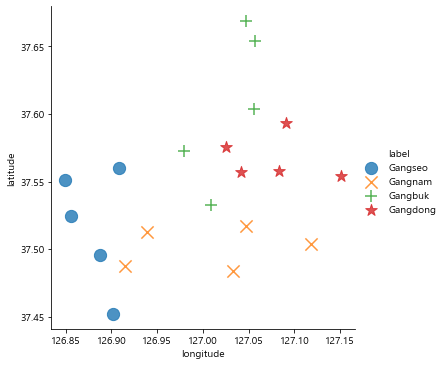

In [46]:
# 데이터 시각화

sns.lmplot("longitude", "latitude", data=train_df, fit_reg=False, 
          markers = ["o", "x", "+", "*"], hue="label", scatter_kws={"s":150})
# 마크를 다르게 사용하려면 hue="label"을 사용해야 한다.
# scatter_kws={"s":150} ::점의 크기를 크게

In [51]:
# 구 이름과 동 이름 삭제
# train_df.drop(["district"], axis = 1, inplace=True)  # axis = 1 : 행 삭제, axis = 0 : 열 삭제
test_df.drop(["dong"], axis=1, inplace=True)

In [53]:
# 삭제된 것을 확인
train_df
test_df

,latitude,longitude,label
0,37.489853,126.854547,Gangseo
1,37.501394,126.859245,Gangseo
2,37.537759,126.847951,Gangseo
3,37.575817,126.815719,Gangseo
4,37.577039,126.891620,Gangseo
5,37.508838,127.030720,Gangnam
6,37.501163,127.057193,Gangnam
7,37.486401,127.018281,Gangnam
8,37.483279,126.988194,Gangnam
9,37.492896,127.043159,Gangnam


In [54]:
# 데이터 준비
X_train = train_df[["longitude","latitude"]]
y_train = train_df[["label"]]

X_test = test_df[["longitude", "latitude"]]
y_test = test_df[["label"]]

In [55]:
# 훈련데이터 label을 문자이기에 숫자로 바꿔서 넣어줘야 한다.
# Label값을 숫자로 변환 
from sklearn import preprocessing

# 문자 --> 숫자
le = preprocessing.LabelEncoder()
y_encode = le.fit_transform(y_train)
y_encode # 무작위로 문자를 숫자로 바뀐 것을 확인

array([3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [57]:
# 훈련 시키기
clf = DecisionTreeClassifier(random_state=35).fit(X_train,y_encode)

In [58]:
# 어떻게 훈련을 했는지 시각화

def display_decision_surface(clf, X, y):
    x_min = X.longitude.min() - 0.01
    x_max = X.longitude.max() + 0.01
    y_min = X.latitude.min() - 0.01
    y_max = X.latitude.max() + 0.01
    
    n_classes = len(le.classes_)
    plot_colors = "rywb"
    plot_step = 0.001
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)
    
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X.loc[idx].longitude, X.loc[idx].latitude, c=color, label=le.classes_[i], cmap=plt.cm.RdYlBu, \
                   edgecolor="black", s=200)
    
    plt.title("Decision surface of a dicision tree", fontsize=16)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, fontsize=14)
    plt.xlabel("longitude", fontsize=16)
    plt.ylabel("latitude", fontsize=16)
    plt.show()

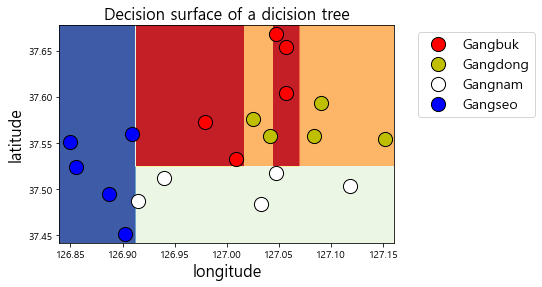

In [59]:
display_decision_surface(clf,X_train, y_encode)

In [62]:
# 가지치기 효과
clf = DecisionTreeClassifier(random_state=70,max_depth=4,
                             min_samples_leaf=2, min_samples_split=2).fit(X_train,y_encode)

# 훈렌데이터에서 약간 틀려도 실제 데이터에서는 더 나은 결과를 낼 수 있다.

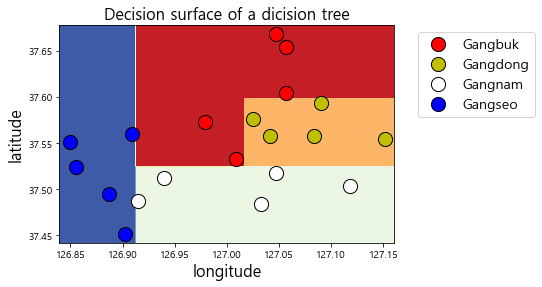

In [63]:
display_decision_surface(clf,X_train, y_encode)

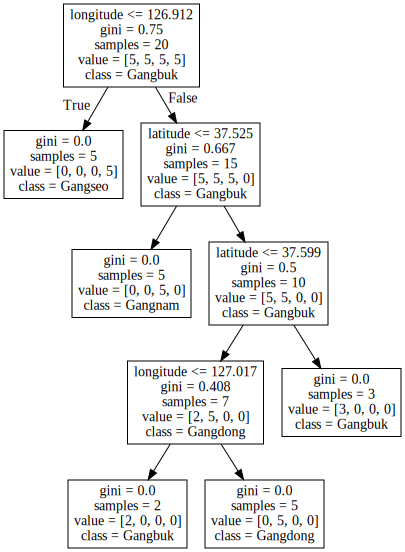

In [70]:
import os
import graphviz
from sklearn.tree import export_graphviz

os.environ["PATH"] += os.pathsep + "C:/Program Files (x86)/Graphviz2.38/bin"

graph = export_graphviz(clf, out_file=None,
               class_names=["Gangbuk", "Gangdong","Gangnam","Gangseo"],
               feature_names=["longitude", "latitude"])
# ut_file=None 저장하지 않기    
g = graphviz.Source(graph)
g.render("seoul")
g

In [71]:
# 정확도 확인

from sklearn.metrics import accuracy_score

pred = clf.predict(X_test)
print("정확도 : ",accuracy_score(y_test.values, le.classes_[pred]))
# le.classes_[pred] : 훈련한 값 

정확도 :  1.0


## RandomForest
- P254
- Decision Tree는 과적합이 문제, 적당한 선에서 가지를 치는 것이 중요!
- 랜덤포레스트는 과적합이 없다. 
- 앙상블 기법(Ensemble) : 여러 개의 알고리즘을 사용하는 것
    + vote 방식
        - 스프트 보팅
        - 하드 보팅
    + 종류
        - Voting
            - 여러개의 분류기가 투표를 통해 최종 예측 결과를 결정
            - 서로 다른 알고리즘을 가지 분류기가 결합
            
        - Bagging
            - 여러개의 분류기가 투표를 통해 최종 예측 결과를 결정
            - 서로 다른 샘플 데이터에서 각각의 분류기가 모두 같은 유형의 알고리즘 기반
            - 랜덤 포레스트
        - Boosting
            - 여러 개으 분류기가 순차적으로 학습을 하되 앞에서 학습한 분류기가 틀린 데이터에 대해서 올바르게 예측할 수 있도록 다음 분류기에서 가중치를 부여
            - Gradient Boosting
            - XGBoost, Light GBM, Stacking
        
        
+ 병렬 수행
    - n_jobs
   
+ 파라미터 
    - n_estimators
    - max_features
    - max_depth

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets

In [78]:

X, y = datasets.make_moons(n_samples=100, noise=0.25, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0,
                                                   stratify=y) 



In [79]:
forest = RandomForestClassifier(random_state=2, n_estimators=5)
forest.fit(X_train,y_train)
# n_estimators= 5: 작은 트리5개

RandomForestClassifier(n_estimators=5, random_state=2)

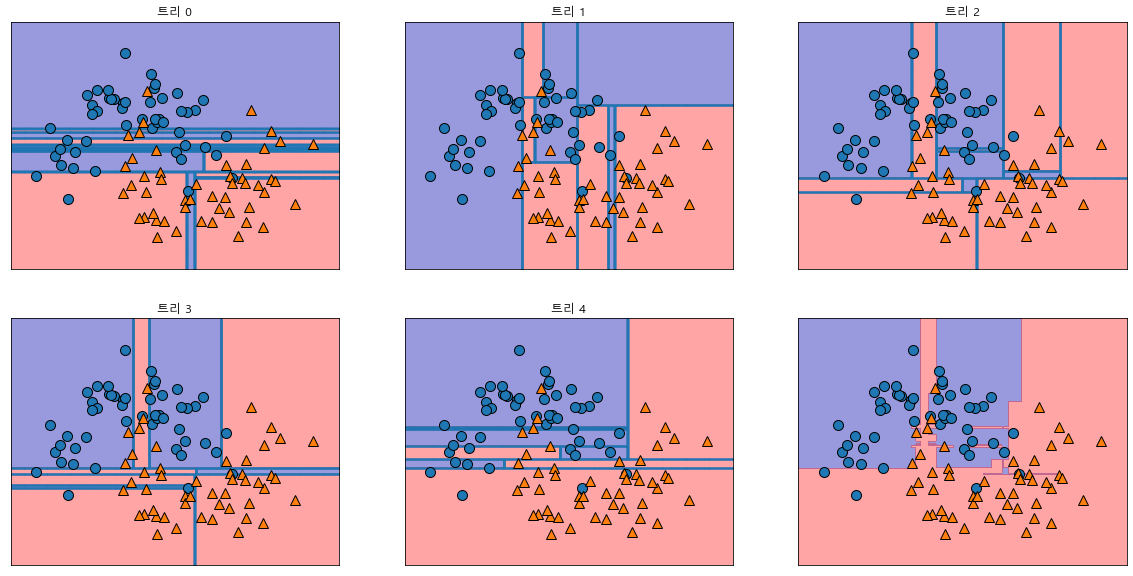

In [80]:
# 트리 

fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("트리 {}".format(i))
    mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, X, fill=True, ax=axes[-1, -1], alpha=.4)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

## Decision Tree VS RandomForest

#### 1. cancer 데이터 활용

In [131]:
cancer = datasets.load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, 
                                                    cancer.target,
                                                    random_state=0) 

In [140]:
# 가지치기후 학습 시키기
model1 = DecisionTreeClassifier(max_depth=3, random_state=0)
model1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [141]:
# 정확도 확인
print('훈련 정확도 : ', model1.score(X_train,y_train))
print("테스트 정확도 : ", model1.score(X_test, y_test))

훈련 정확도 :  0.9765258215962441
테스트 정확도 :  0.9370629370629371


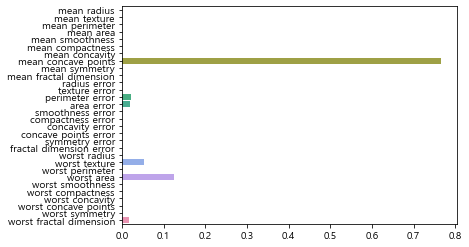

In [142]:
sns .barplot(x=model1.feature_importances_,y=cancer.feature_names)

In [143]:
# 랜덤 포레스트와 비교
model2 = RandomForestClassifier(random_state=0, n_estimators=100)
model2.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

In [144]:
print('훈련 정확도 : ', model2.score(X_train,y_train))
print("테스트 정확도 : ", model2.score(X_test, y_test))

훈련 정확도 :  1.0
테스트 정확도 :  0.972027972027972


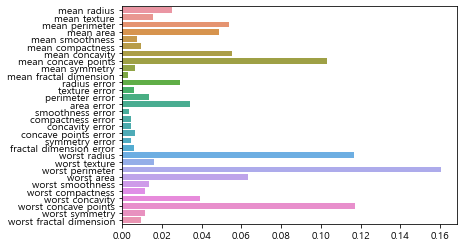

In [90]:
sns .barplot(x=model2.feature_importances_,y=cancer.feature_names)

#### 2. 손글씨 이미지 데이터 활용

In [92]:
mnist = datasets.load_digits()
print(mnist.data.shape)
mnist.target

(1797, 64)


array([0, 1, 2, ..., 8, 9, 8])

In [93]:
X, y = mnist.data, mnist.target

In [98]:
# cross validation (교차검증)을 위한 공용함수

# 훈련데이터 안에서 나눠서 한부분이 테스트하고 나머지가 훈련데이터가 되어 계속 반복
from sklearn.model_selection import cross_val_score

def cross_validation(clf, features, labels):
    cv_scores = []
    for i in range(10):
        scores = cross_val_score(clf, features, labels, cv=10,scoring="accuracy")
# cv=10  :10을 돌면서 검사
        cv_scores.append(scores.mean())
    return cv_scores

In [103]:
dt_cv_scores = cross_validation(DecisionTreeClassifier(),X, y)
rf_cv_scores = cross_validation(RandomForestClassifier(),X, y)

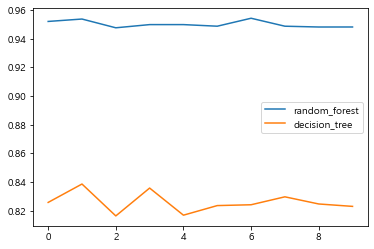

In [106]:
# 그래프로 그려 확인
df = pd.DataFrame({"random_forest":rf_cv_scores, "decision_tree":dt_cv_scores})
df.head()
df.plot()

In [109]:
print("Decision :",np.mean(dt_cv_scores))
print("랜덤포레스트 :",np.mean(rf_cv_scores))

Decision : 0.8258541278708875
랜덤포레스트 : 0.9501874612042209


### 사례1 : 독버섯 데이터 활용
- https://archive.ics.uci.edu/ml/index.php
- https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data

- 파일명 mushrooms.csv로 변경

In [2]:
# 
import urllib.request as req 

savedir = '../Acorn machine learning/mushrooms1.csv'
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"
req.urlretrieve(url,savedir)
print("다운로드 완료")
# 이 방법으로도 파일 다운로드 가능

다운로드 완료


In [4]:
mr = pd.read_csv("../Acorn machine learning/mushrooms.csv",header=None)
mr.head()
mr.shape
# p : 독버섯, e : 식용 버섯

(8124, 23)

In [5]:
# 결측치 확인 
mr.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
dtype: int64

In [6]:
# 특성
mr.describe()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [7]:
# 데이터와 레이블 분리
# 0컬럼을 y, 나머지를 X
X = mr.drop(0, axis=1)
y = mr[0]

In [121]:
X.head()
y.head()

0    p
1    e
2    e
3    p
4    e
Name: 0, dtype: object

In [8]:
# 문자를 숫자로 
from sklearn.preprocessing import LabelEncoder

encoder_X = LabelEncoder()

for col in X.columns:
    X[col] = encoder_X.fit_transform(X[col])

encoder_y = LabelEncoder()
y = encoder_y.fit_transform(y)

In [9]:
X.head()
y

array([1, 0, 0, ..., 0, 1, 0])

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y) 


In [15]:
clf = RandomForestClassifier().fit(X_train, y_train)

In [16]:
# 잘 학습 되었는지 예측해보기
pred = clf.predict(X_test)

In [17]:
from sklearn.metrics import accuracy_score,classification_report

print("정답률 : ", accuracy_score(y_test, pred))
print("오차율 : ",classification_report(y_test,pred))

정답률 :  1.0
오차율 :                precision    recall  f1-score   support

           0       1.00      1.00      1.00      1044
           1       1.00      1.00      1.00       987

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



In [ ]:
# decision tree, knn, logistic regression 확인해보기


In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [19]:
# decition tree, 처음에는 파라미터 없이, 결과가 안 좋을 때 사용

clf = DecisionTreeClassifier().fit(X_train, y_train)
# Gridsearch 
pred = clf.predict(X_test)

print("정답률 : ", accuracy_score(y_test, pred))
print("오차율 : ",classification_report(y_test,pred))

정답률 :  1.0
오차율 :                precision    recall  f1-score   support

           0       1.00      1.00      1.00      1044
           1       1.00      1.00      1.00       987

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



In [20]:
# KNN

clf = KNeighborsClassifier().fit(X_train, y_train)
# Gridsearch 
pred = clf.predict(X_test)

print("정답률 : ", accuracy_score(y_test, pred))
print("오차율 : ",classification_report(y_test,pred))

정답률 :  0.9980305268340719
오차율 :                precision    recall  f1-score   support

           0       1.00      1.00      1.00      1044
           1       1.00      1.00      1.00       987

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



In [22]:
# Logiticregression
# max_iter = : 반복횟수
clf = LogisticRegression(max_iter = 1000).fit(X_train, y_train)
# Gridsearch 
pred = clf.predict(X_test)

print("정답률 : ", accuracy_score(y_test, pred))
print("오차율 : ",classification_report(y_test,pred))

정답률 :  0.9492860659773511
오차율 :                precision    recall  f1-score   support

           0       0.94      0.96      0.95      1044
           1       0.96      0.94      0.95       987

    accuracy                           0.95      2031
   macro avg       0.95      0.95      0.95      2031
weighted avg       0.95      0.95      0.95      2031



----
## Gradient Boosting Regression Tree

+ 분류와 회귀에서 모두 사용가능
+ 이전 트리의 오차를 보완하는 방식으로 트리 생성(경사하강법[Gradient descent])
+ random forest보다는 매개변수 설정에 조금 더 민감하지만 잘 조정하며 ㄴ더 높은 정확도를 제공
+ Learning_rate를 사용해서 오차보정

In [23]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_breast_cancer

In [26]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, 
                                                    cancer.target,
                                                    random_state=42) 


In [29]:
# 기본 값으로 훈련시키기
tree = GradientBoostingClassifier(random_state=0).fit(X_train, y_train)

print("훈련 정확도 : ", tree.score(X_train, y_train))
print("테스트 정확도 : ", tree.score(X_test, y_test))
# 기본값으로 했을 때  과적합임을 알 수 있다.

훈련 정확도 :  1.0
테스트 정확도 :  0.958041958041958


In [31]:
# max_depth
tree = GradientBoostingClassifier(random_state=0, max_depth=1).fit(X_train, y_train)

print("훈련 정확도 : ", tree.score(X_train, y_train))
print("테스트 정확도 : ", tree.score(X_test, y_test))

훈련 정확도 :  0.9906103286384976
테스트 정확도 :  0.965034965034965


In [30]:
# learning_rate
tree = GradientBoostingClassifier(random_state=0, learning_rate=0.01).fit(X_train, y_train)

print("훈련 정확도 : ", tree.score(X_train, y_train))
print("테스트 정확도 : ", tree.score(X_test, y_test))

훈련 정확도 :  0.9929577464788732
테스트 정확도 :  0.958041958041958


훈련 정확도 :  0.9906103286384976
테스트 정확도 :  0.965034965034965


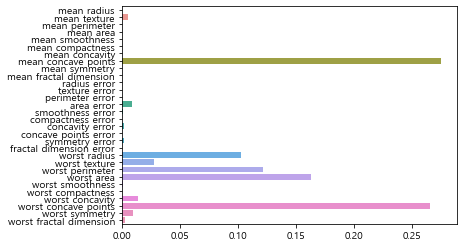

In [32]:
# 특성 중요도

tree = GradientBoostingClassifier(random_state=0, max_depth=1).fit(X_train, y_train)

print("훈련 정확도 : ", tree.score(X_train, y_train))
print("테스트 정확도 : ", tree.score(X_test, y_test))

sns.barplot(x=tree.feature_importances_, y=cancer.feature_names)

---
## Voting Classifier

#### 여러 알고리즘 묶어서 사용하는 방식


In [33]:

from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score

In [60]:
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data,  cancer.target,
                                                   random_state=156,
                                                   test_size=0.2) 

In [61]:
lr_clf = LogisticRegression(max_iter=10000)
knn_clf = KNeighborsClassifier(n_neighbors=8)

In [62]:
vo_clf = VotingClassifier(estimators=[("LR",lr_clf),("KNN",knn_clf)],
                         voting="soft")
# LR, KNN은 아무거로 해도 상관 NO
# voting=은 soft,hard 방식이 있다.


In [63]:
vo_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('LR', LogisticRegression(max_iter=10000)),
                             ('KNN', KNeighborsClassifier(n_neighbors=8))],
                 voting='soft')

In [64]:
pred = vo_clf.predict(X_test)
print("Voting 분류기 정확도 :", accuracy_score(y_test, pred) )

Voting 분류기 정확도 : 0.9473684210526315


In [65]:
# 

classifiers = [lr_clf,knn_clf]

for clf in classifiers:
    clf.fit(X_train,y_train)
    pred = clf.predict(X_test)
    class_name = clf.__class__.__name__
    print("{0}정확도 : {1:4f}".format(class_name, accuracy_score(y_test,pred)))

LogisticRegression정확도 : 0.964912
KNeighborsClassifier정확도 : 0.938596


---
### Grid Search

In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_moons

In [86]:
X, y = make_moons(n_samples=100, noise=0.25, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, 
                                                   stratify=y)

In [87]:
#  기본값으로 확인

clf = RandomForestClassifier(n_estimators=100).fit(X_train, y_train)
clf.predict(X_test)

print("훈련 정확도 : ", clf.score(X_train, y_train))
print("테스트 정확도 : ", clf.score(X_test, y_test))
# 과적합이다.

훈련 정확도 :  1.0
테스트 정확도 :  0.8


In [81]:
# 자동으로 입력해서 찾을 수 있도록

In [82]:
from sklearn.model_selection import GridSearchCV

In [83]:
params = {
    'n_estimators':[100,200],
    'max_depth':[2,3,4,5,6,7,8,9],
    'min_samples_leaf':[1,2,3,4,5],
    'min_samples_split':[3, 4, 8, 9,10]
}
clf2 = RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(clf2, param_grid=params, cv=2, n_jobs=-1)
# cv= : cross validation
grid_cv.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(n_jobs=-1, random_state=0),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [3, 4, 8, 9, 10],
                         'n_estimators': [100, 200]})

In [85]:
print("최적의 하이퍼 파라미터\n", grid_cv.best_params_)
print("최고 예측 정확도 : ",grid_cv.best_score_)

최적의 하이퍼 파라미터
 {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 100}
최고 예측 정확도 :  0.8929587482219061


In [89]:
# 기본값
clf3 = GradientBoostingClassifier(random_state=0).fit(X_train, y_train)

clf3.predict(X_test)
print("훈련 정확도 : ", clf3.score(X_train, y_train))
print("테스트 정확도 : ", clf3.score(X_test, y_test))

훈련 정확도 :  1.0
테스트 정확도 :  0.88


In [90]:
# Grident Boosting

params = {
    'n_estimators':[100, 200],
    'learning_rate':[0.1,0.01,0.001,1],
    'max_depth':[3,4,5,6,7]
}

clf4 = GradientBoostingClassifier(random_state=0)
grid_cv = GridSearchCV(clf4, param_grid=params, cv=2, n_jobs=-1, verbose=1)

grid_cv.fit(X_train, y_train)

print("최적의 하이퍼 파라미터\n", grid_cv.best_params_)
print("최고 예측 정확도 : ",grid_cv.best_score_)

Fitting 2 folds for each of 40 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    4.1s


최적의 하이퍼 파라미터
 {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
최고 예측 정확도 :  0.8392603129445235


[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    4.8s finished


In [91]:
pred = grid_cv.best_estimator_.predict(X_test)
print("정확도 : ", accuracy_score(y_test, pred))

정확도 :  0.76
